Welcome to Machine Learning!

In [1]:
import sys
assert sys.version_info >= (3, 7)
from packaging import version
import sklearn
assert version.parse(sklearn.__version__) >= version.parse('1.0.1')
import pandas as pd
import numpy as np

额外的代码，和本节内容无关，主要是用于保存图片

In [2]:
img_path = '../Tex/img/codes/'
def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    path = img_path + f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
housing = pd.read_csv('data/housing.csv')

In [4]:
housing.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
9527,-117.32,34.24,29.0,1290.0,263.0,323.0,113.0,1.9265,103300.0,INLAND
3319,-117.13,32.92,16.0,2173.0,399.0,1460.0,393.0,4.2614,169600.0,<1H OCEAN
13332,-121.63,39.18,13.0,1907.0,347.0,821.0,367.0,2.0978,134000.0,INLAND
805,-120.88,37.37,24.0,1294.0,222.0,684.0,221.0,2.6908,103100.0,INLAND
6997,-123.08,40.40,10.0,365.0,102.0,140.0,49.0,1.7969,37500.0,INLAND


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
# housing.describe()
housing.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


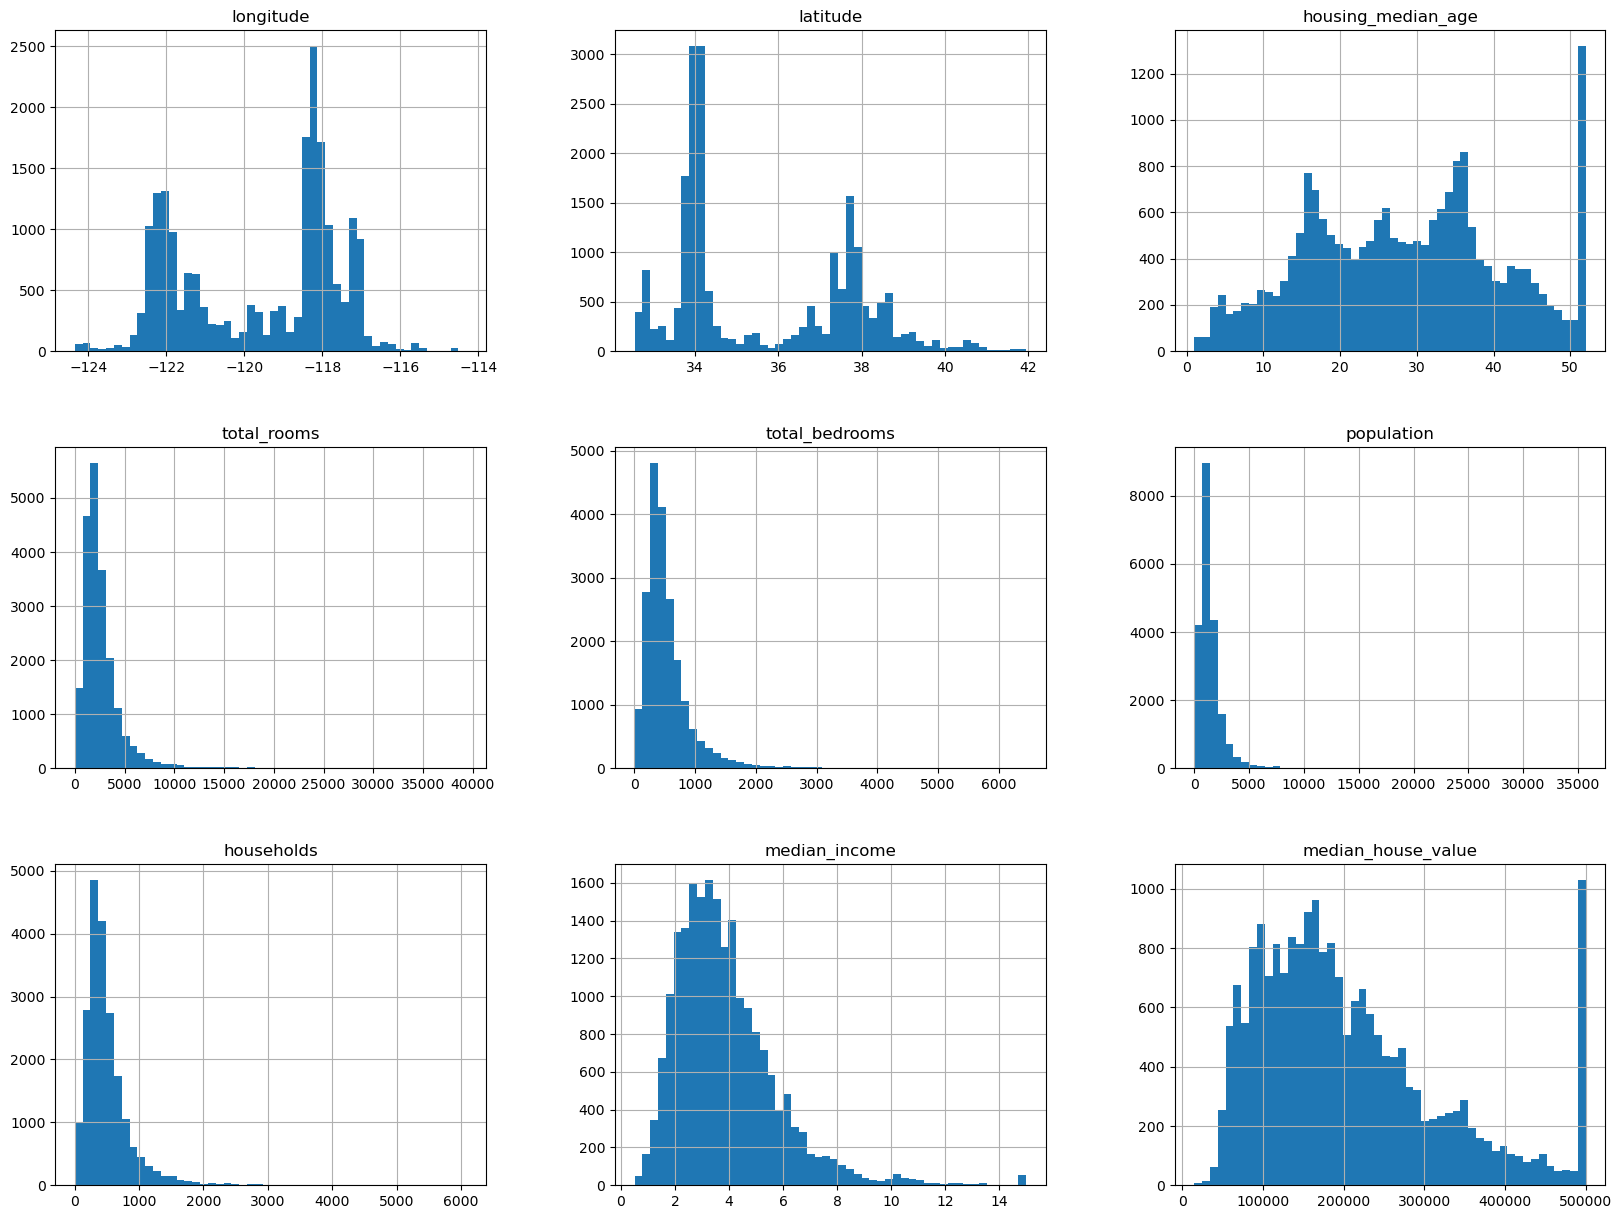

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20, 15))
plt.show()

In [9]:
import numpy as np
def split_train_test(data, test_ratio):
    # np.random.seed(39)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[: test_set_size]
    train_indices = shuffled_indices[test_set_size: ]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(housing, .2)
len(train_set), len(test_set)
# (16512, 4128)

(16512, 4128)

In [10]:
from zlib import crc32
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2 ** 32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, .2, 'index')
len(train_set), len(test_set)
# (16512, 4128)

(16512, 4128)

In [11]:
housing_with_id['id'] = housing['longitude'] * 1000 + housing['latitude']
train_set, test_set = split_train_test_by_id(housing_with_id, .2, 'id')
len(train_set), len(test_set)

(16322, 4318)

In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=.2, random_state=42)
len(train_set), len(test_set)
(16512, 4128)

(16512, 4128)

In [13]:
from scipy.stats import binom
sample_size = 1000
ratio_female = 0.513
# female less than 485
proba_too_small = binom(sample_size, ratio_female).cdf(485 - 1)
# female more than 535
proba_too_large = 1 - binom(sample_size, ratio_female).cdf(535)
print(proba_too_small + proba_too_large)

0.11294380139035697


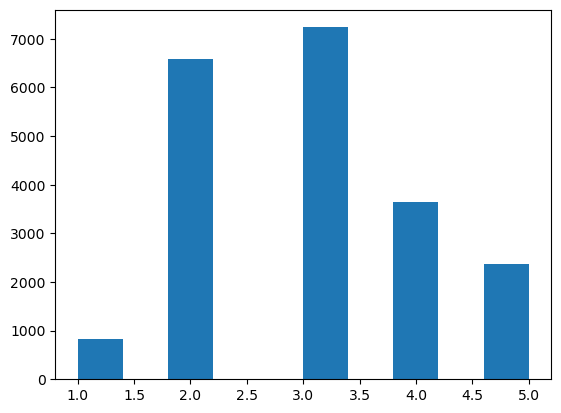

In [14]:
housing['income_cat'] = pd.cut(housing['median_income'],
                                bins=[0, 1.5, 3.0, 4.5, 6, np.inf], 
                                labels=[1, 2, 3, 4, 5])
housing['income_cat'].hist(grid=False)
plt.show()

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [16]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [17]:
def income_cat_proportions(data):
    return data['income_cat'].value_counts() / len(data)
train_set, test_set = train_test_split(housing, test_size=.2, random_state=42)
compare_props = pd.DataFrame({
    'Overall %': income_cat_proportions(housing),
    'Stratifies %': income_cat_proportions(strat_test_set),
    'Random %': income_cat_proportions(test_set)
    }
).sort_index()
compare_props.index.name = 'Income Category'
compare_props['Strat. Error %'] = (compare_props['Stratifies %'] / compare_props['Overall %'] - 1)
compare_props['Rand. Error %'] = (compare_props['Random %'] / compare_props['Overall %'] - 1)
(100 * compare_props).round(2)

,Overall %,Stratifies %,Random %,Strat. Error %,Rand. Error %
Income Category,,,,,
1,3.98,4.00,4.24,0.36,6.45
2,31.88,31.88,30.74,-0.02,-3.59
3,35.06,35.05,34.52,-0.01,-1.53
4,17.63,17.64,18.41,0.03,4.42
5,11.44,11.43,12.09,-0.08,5.63


In [18]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis='columns', inplace=True)

In [19]:
housing = strat_train_set.copy()

D:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


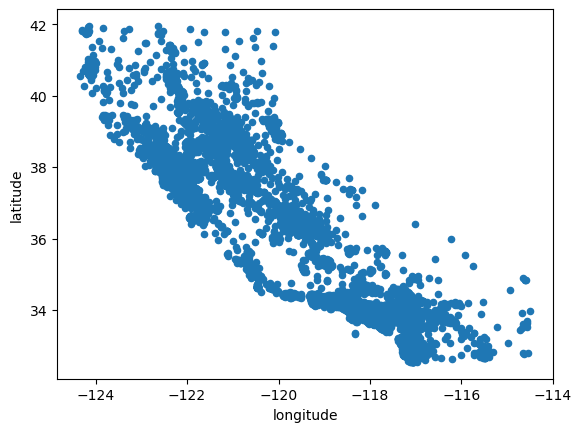

In [20]:
housing.plot(kind='scatter', x='longitude', y='latitude')
plt.show()

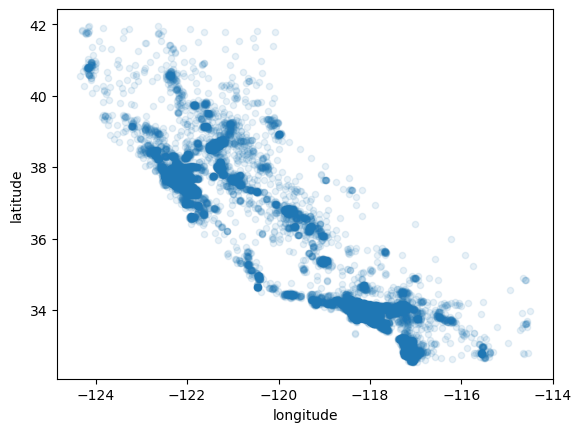

In [21]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=.1)
plt.show()

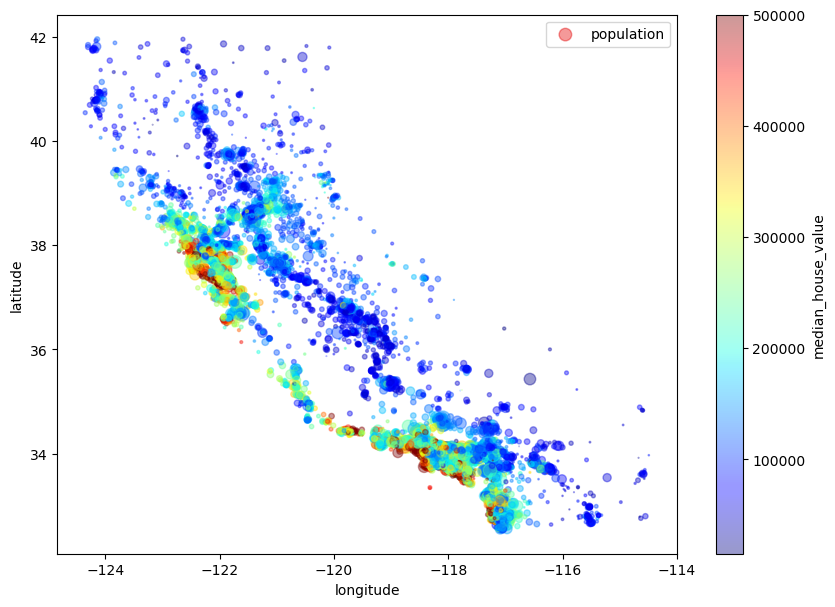

In [22]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=.4, s=housing['population'] / 100,
             label='population', figsize=(10, 7),
             c='median_house_value', cmap='jet', colorbar=True)
plt.legend()
plt.show()

In [23]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

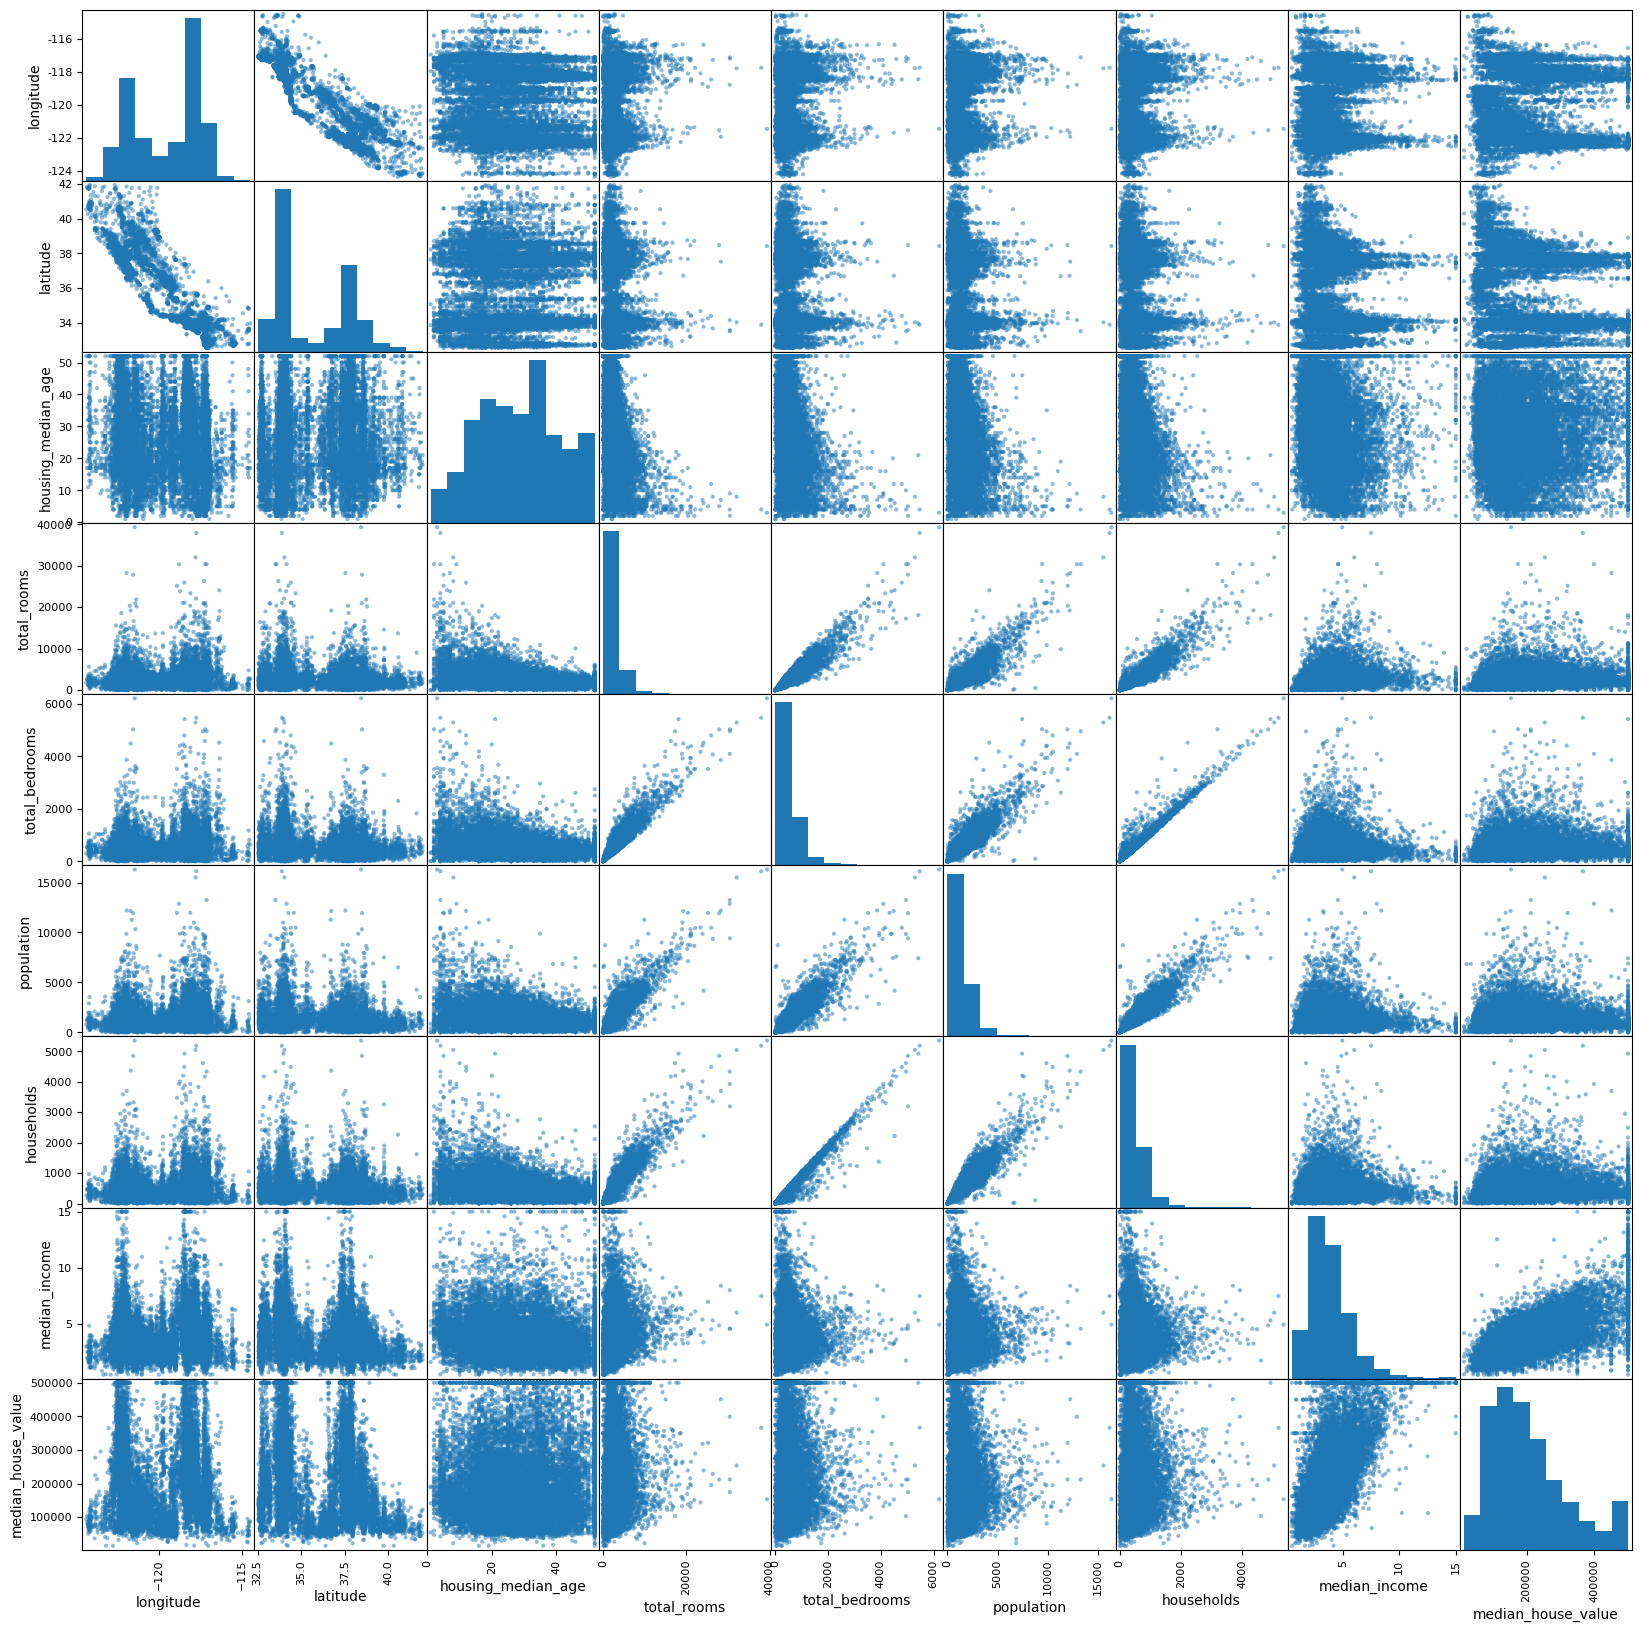

In [24]:
from pandas.plotting import scatter_matrix
scatter_matrix(housing, figsize=(20, 20))
plt.show()

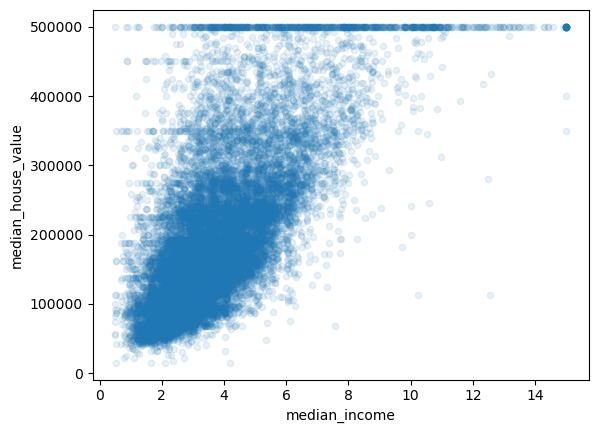

In [25]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=.1)
plt.show()

In [26]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

In [27]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688380
rooms_per_household         0.143663
total_rooms                 0.137455
housing_median_age          0.102175
households                  0.071426
total_bedrooms              0.054635
population                 -0.020153
population_per_household   -0.038224
longitude                  -0.050859
latitude                   -0.139584
bedrooms_per_room          -0.256397
Name: median_house_value, dtype: float64

In [28]:
housing = strat_train_set.drop('median_house_value', axis='columns')
housing_labels = strat_train_set['median_house_value'].copy()

In [29]:
housing.dropna(subset=['total_bedrooms'])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,<1H OCEAN
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,INLAND
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,NEAR OCEAN
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455,<1H OCEAN


In [30]:
from sklearn.impute import SimpleImputer

In [31]:
imputer = SimpleImputer(strategy='median')

In [32]:
housing_num = housing.drop('ocean_proximity', axis='columns')

In [33]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [34]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [35]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [36]:
X = imputer.transform(housing_num)

In [37]:
housing_tr = pd.DataFrame(X,
                          columns=housing_num.columns,
                          index=housing_num.index)

In [38]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292
...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455


# Handling Text and Categorical Attributes

In [39]:
housing_cat = housing[["ocean_proximity"]]

In [40]:
housing_cat.head(10)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY
18031,<1H OCEAN
6753,<1H OCEAN


In [41]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.],
       [0.],
       [0.]])

In [42]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [43]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [44]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [45]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [46]:
from sklearn.preprocessing import MinMaxScaler

min_max_scalar = MinMaxScaler(feature_range=(-1, 1))
housing_num_min_max_scaled = min_max_scalar.fit_transform(housing_num)
pd.DataFrame(housing_num_min_max_scaled).sample(3)

,0,1,2,3,4,5,6,7
2624,0.490872,-0.980851,-0.607843,-0.842515,-0.842487,-0.829714,-0.819675,-0.382174
1359,0.466531,-0.889362,0.725490,-0.947607,-0.924626,-0.955834,-0.934292,-0.567040
1472,0.298174,-0.721277,0.333333,-0.874053,-0.861491,-0.836830,-0.840956,-0.350354


In [47]:
from sklearn.preprocessing import StandardScaler
std_scalar = StandardScaler()
housing_num_std_scalar = std_scalar.fit_transform(housing_num)
pd.DataFrame(housing_num_std_scalar).sample(3)

,0,1,2,3,4,5,6,7
8879,-1.103127,0.797970,-1.396635,0.254252,-0.304233,0.318321,-0.214155,1.689681
13540,0.636383,-0.777107,1.225459,-0.477024,-0.356139,-0.478199,-0.467515,-1.012131
2130,0.741354,-0.720854,-0.125317,1.542451,2.342935,2.004532,2.468328,-0.595613


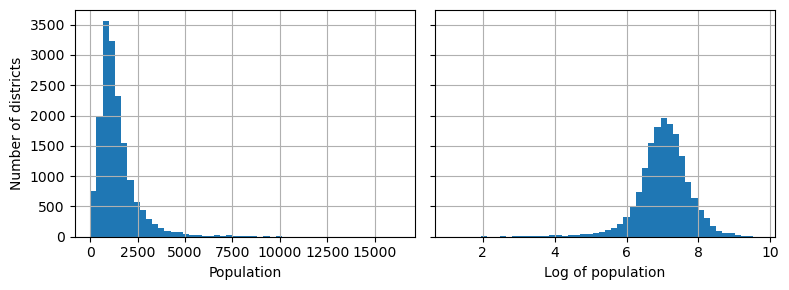

In [48]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
housing['population'].hist(ax=axs[0], bins=50)
housing['population'].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel('Population')
axs[1].set_xlabel('Log of population')
axs[0].set_ylabel('Number of districts')
save_fig('Transforming a feature to make it closer to a Gaussian distribution')
plt.show()

额外的代码

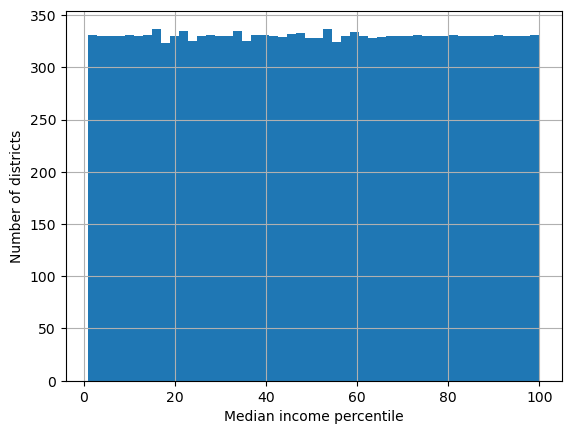

In [49]:
percentiles = [np.percentile(housing.median_income, p) for p in range(1, 100)] 
flattened_median_income = pd.cut(housing.median_income,
                                 bins=[-np.inf] + percentiles + [np.inf],
                                 labels=range(1, 100 + 1))
flattened_median_income.hist(bins=50)
plt.xlabel("Median income percentile")
plt.ylabel("Number of districts")
plt.show()

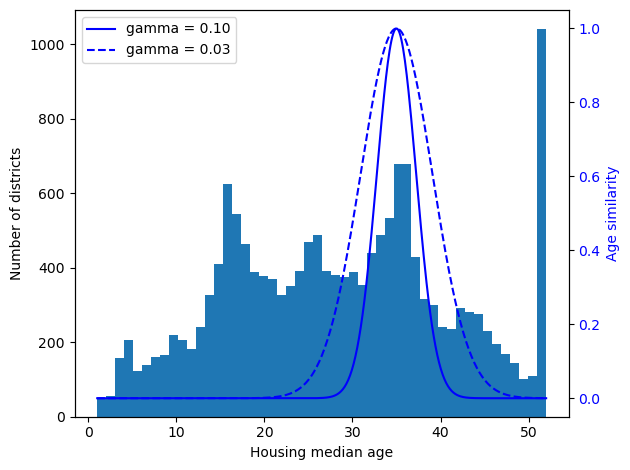

In [50]:
from sklearn.metrics.pairwise import rbf_kernel

# 更一般的情况，是向量与向量之间的RBF，因此需要使用DataFrame
age_simil_35 = rbf_kernel(housing[['housing_median_age']], [[35]], gamma=.1)

ages = np.linspace(housing['housing_median_age'].min(),
                   housing['housing_median_age'].max(),
                   500).reshape(-1, 1)
gamma1 = .1
gamma2 = .03
rbf1 = rbf_kernel(ages, [[35]], gamma=gamma1)
rbf2 = rbf_kernel(ages, [[35]], gamma=gamma2)

fig, ax1 = plt.subplots()

ax1.set_xlabel('Housing median age')
ax1.set_ylabel('Number of districts')
ax1.hist(housing['housing_median_age'], bins=50)

ax2 = ax1.twinx()
color = 'blue'
ax2.plot(ages, rbf1, color=color, label='gamma = 0.10')
ax2.plot(ages, rbf2, color=color, label='gamma = 0.03', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel('Age similarity', color=color)
plt.legend()

save_fig('Gaussian RBF feature measuring the similarity')
plt.show()

In [51]:
from sklearn.linear_model import LinearRegression

target_scalar = StandardScaler()
scaled_labels = target_scalar.fit_transform(housing_labels.to_frame())

model = LinearRegression()
model.fit(housing[['median_income']], scaled_labels)
# pretend this is new data
some_new_data = housing[['median_income']].iloc[:5]

scaled_predictions = model.predict(some_new_data)
predictions = target_scalar.inverse_transform(scaled_predictions)
# predictions.flatten()

In [52]:
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(LinearRegression(),
                                   transformer=StandardScaler())
model.fit(housing[['median_income']], housing_labels)
predictions = model.predict(some_new_data)

predictions

array([131997.15275877, 299359.35844434, 146023.37185694, 138840.33653057,
       192016.61557639])

## Custom Transformers

Let’s create a log-transformer and apply it to the population feature:

In [53]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(housing[['population']])

In [54]:
rbf_transformer = FunctionTransformer(rbf_kernel,
                                      kw_args=dict(Y=[[35]], gamma=.1))
age_simil_35 = rbf_transformer.transform(housing[['housing_median_age']])
age_simil_35

array([[2.81118530e-13],
       [8.20849986e-02],
       [6.70320046e-01],
       ...,
       [9.55316054e-22],
       [6.70320046e-01],
       [3.03539138e-04]])

In [55]:
sf_coords = 37.7749, -122.41
sf_transformer = FunctionTransformer(rbf_kernel,
                                     kw_args=dict(Y=[sf_coords], gamma=.1))

sf_simil = sf_transformer.transform(housing[['latitude', 'longitude']])
sf_simil

array([[0.999927  ],
       [0.05258419],
       [0.94864161],
       ...,
       [0.00388525],
       [0.05038518],
       [0.99868067]])

In [56]:
ratio_transformer = FunctionTransformer(lambda X: X[:, [0]] / X[:, [1]])
ratio_transformer.transform(np.array([[1, 2], [3, 4], [5, 6], [6, 7]]))

array([[0.5       ],
       [0.75      ],
       [0.83333333],
       [0.85714286]])

Here’s a custom transformer that acts much like the StandardScaler:

In [57]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScaler(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):
        self.with_mean = with_mean
        
    def fit(self, X, y=None):
        X = check_array(X)
        self.mean_ = X.mean(axis='index')
        self.scale_ = X.std(axis='index')
        self.n_features_in_ = X.shape[1]
        return self

    def transform(self, X):
        check_is_fitted(self)
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_

In [58]:
# 如果在这里出现问题，需要检查numpy的版本
# 极大可能是因为numpy的版本问题
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=90, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state
        
    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self
    
    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [f'Cluster {i} similarity' for i in range(self.n_clusters)]

In [59]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1, random_state=42)
similarities = cluster_simil.fit_transform(housing[['latitude', 'longitude']], sample_weight=housing_labels)

In [60]:
similarities[:3].round(2)

array([[0.  , 0.14, 0.  , 0.  , 0.  , 0.08, 0.  , 0.99, 0.  , 0.6 ],
       [0.63, 0.  , 0.99, 0.  , 0.  , 0.  , 0.04, 0.  , 0.11, 0.  ],
       [0.  , 0.29, 0.  , 0.  , 0.01, 0.44, 0.  , 0.7 , 0.  , 0.3 ]])

额外的代码

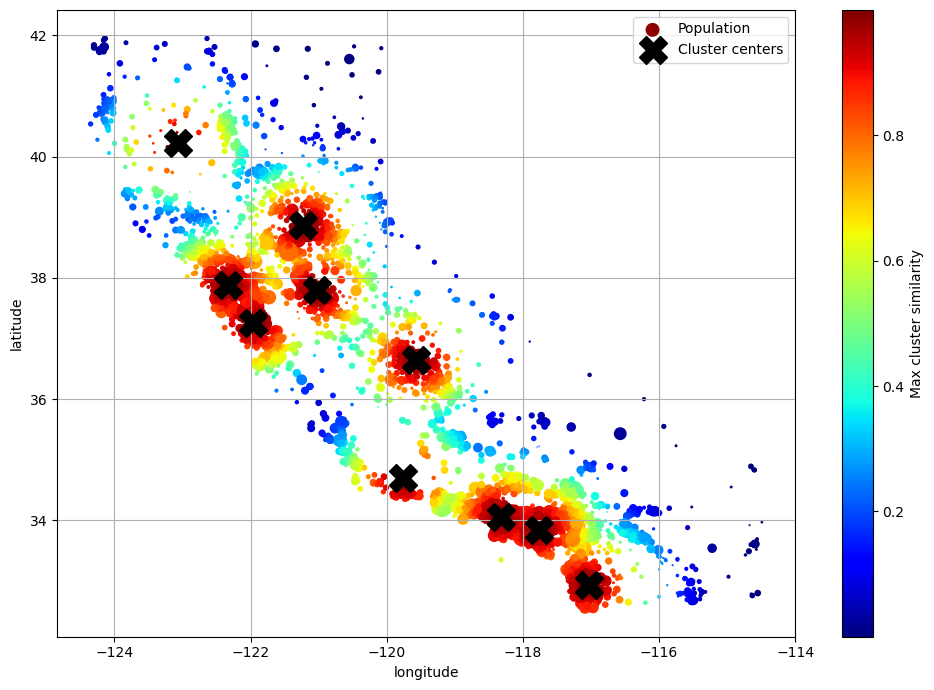

In [61]:
housing_copy = housing.copy()
housing_copy['Max cluster similarity'] = similarities.max(axis=1)

housing_copy.plot(kind='scatter', x='longitude', y='latitude', grid=True,
                  s=housing_copy['population'] / 100, label='Population',
                  c='Max cluster similarity',
                  cmap='jet', colorbar=True,
                  legend=True, sharex=True, figsize=(10, 7))

plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1],
         cluster_simil.kmeans_.cluster_centers_[:, 0],
         linestyle='', color='black', marker='X', markersize=20,
         label='Cluster centers')
plt.legend(loc='upper right')
save_fig('Gaussian RBF similarity to the nearest cluster center')
plt.show()

### Transformation Pipelines


不知道为什么，这里需要重新加载以下代码：
```python
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
```

In [62]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('standardize', StandardScaler())
])


In [63]:
from sklearn.pipeline import make_pipeline
num_pipeline = make_pipeline(SimpleImputer(strategy='median'), StandardScaler())
housing_num_prepared = num_pipeline.fit_transform(housing_num)
housing_num_prepared[: 2].round(2)

array([[-1.42,  1.01,  1.86,  0.31,  1.37,  0.14,  1.39, -0.94],
       [ 0.6 , -0.7 ,  0.91, -0.31, -0.44, -0.69, -0.37,  1.17]])

In [64]:
df_housing_num_prepared = pd.DataFrame(
    housing_num_prepared,
    columns=num_pipeline.get_feature_names_out(),
    index=housing_num.index
)

In [65]:
# 如果没有必要的话，这段代码不需要看
def monkey_patch_get_signature_names_out():
    """
    Monkey patch some classes which did not handle get_feature_names_out()
    correctly in Scikit-Learn 1.0.*. 
    """
    from inspect import Signature, signature, Parameter
    import pandas as pd
    from sklearn.impute import SimpleImputer
    from sklearn.pipeline import Pipeline
    from sklearn.preprocessing import FunctionTransformer, StandardScaler
    
    default_get_feature_names_out = StandardScaler.get_feature_names_out
    if not hasattr(SimpleImputer, 'get_feature_names_out'):
        print('Monkey-patching SimpleImputer.get_feature_names_out()')
        SimpleImputer.get_feature_names_out = default_get_feature_names_out
        
    if not hasattr(FunctionTransformer, 'get_feature_names_out'):
        print('Monkey-patching FunctionTransformer.get_feature_names_out()')
        orig_init = FunctionTransformer.__init__
        orig_sig = signature(orig_init)
        
        def __init__(*args, feature_names_out=None, **kwargs):
            orig_sig.bind(*args, **kwargs)
            orig_init(*args, **kwargs)
            args[0].feature_names_out = feature_names_out
            
            
        __init__.__signature__ = Signature(
            list(signature(orig_init).parameters.values()) + [
                Parameter('feature_names_out', Parameter.KEYWORD_ONLY)
            ]
        )
        
        def get_feature_names_out(self, names=None):
            if callable(self.feature_names_out):
                return self.feature_names_out(self, names)
            assert self.feature_names_out == 'one-to-one'
            return default_get_feature_names_out(self, names)
        
        FunctionTransformer.__init__ = __init__
        FunctionTransformer.get_feature_names_out = get_feature_names_out
        
monkey_patch_get_signature_names_out()  

In [66]:
df_housing_num_prepared.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942
3785,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789


In [67]:
num_pipeline.steps

[('simpleimputer', SimpleImputer(strategy='median')),
 ('standardscaler', StandardScaler())]

In [68]:
num_pipeline[1]

StandardScaler()

In [69]:
num_pipeline[:-1]

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median'))])

In [70]:
num_pipeline.named_steps['simpleimputer']

SimpleImputer(strategy='median')

In [71]:
num_pipeline.set_params(simpleimputer__strategy='median')

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [72]:
from sklearn.compose import ColumnTransformer

num_attribs = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
               'total_bedrooms', 'population', 'households', 'median_income']

cat_attribs = ['ocean_proximity']

cat_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore')
)

preprocessing = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', cat_pipeline, cat_attribs)
])

In [73]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object))
)

In [74]:
housing_prepared = preprocessing.fit_transform(housing)

In [75]:
housing_prepared_fr = pd.DataFrame(
    housing_prepared,
    columns=preprocessing.get_feature_names_out(),
    index=housing.index
)
housing_prepared_fr.head(2)

,pipeline-1__longitude,pipeline-1__latitude,pipeline-1__housing_median_age,pipeline-1__total_rooms,pipeline-1__total_bedrooms,pipeline-1__population,pipeline-1__households,pipeline-1__median_income,pipeline-2__ocean_proximity_<1H OCEAN,pipeline-2__ocean_proximity_INLAND,pipeline-2__ocean_proximity_ISLAND,pipeline-2__ocean_proximity_NEAR BAY,pipeline-2__ocean_proximity_NEAR OCEAN
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491,0.0,0.0,0.0,1.0,0.0
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942,1.0,0.0,0.0,0.0,0.0


In [76]:
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ['ratio']

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy='median'),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler()
    )
    
log_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    FunctionTransformer(np.log, feature_names_out='one-to-one'),
    StandardScaler())

cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1, random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy='median'),
                                      StandardScaler())

preprocessing = ColumnTransformer([
    ('bedrooms', ratio_pipeline(), ['total_bedrooms', 'total_rooms']),
    ('rooms_per_house', ratio_pipeline(), ['total_rooms', 'households']),
    ('people_per_house', ratio_pipeline(), ['population', 'households']),
    ('log', log_pipeline, ['total_bedrooms', 'total_rooms', 'population', 
                             'households', 'median_income']),
    ('geo', cluster_simil, ['latitude', 'longitude']),
    ('cat', cat_pipeline, make_column_selector(dtype_include=object))
],
                                  remainder=default_num_pipeline)

In [77]:
housing_prepared = preprocessing.fit_transform(housing)

In [78]:
pd.DataFrame(
    housing_prepared, 
    columns=preprocessing.get_feature_names_out(),
    index=housing.index).head(3)

,bedrooms__ratio,rooms_per_house__ratio,people_per_house__ratio,log__total_bedrooms,log__total_rooms,log__population,log__households,log__median_income,geo__Cluster 0 similarity,geo__Cluster 1 similarity,...,geo__Cluster 6 similarity,geo__Cluster 7 similarity,geo__Cluster 8 similarity,geo__Cluster 9 similarity,cat__ocean_proximity_<1H OCEAN,cat__ocean_proximity_INLAND,cat__ocean_proximity_ISLAND,cat__ocean_proximity_NEAR BAY,cat__ocean_proximity_NEAR OCEAN,remainder__housing_median_age
13096,1.846624,-0.866027,-0.330204,1.324114,0.637892,0.456906,1.310369,-1.071522,3.788947e-18,1.319640e-01,...,3.398866e-24,9.698809e-01,7.073518e-08,5.824761e-01,0.0,0.0,0.0,1.0,0.0,1.861119
14973,-0.508121,0.024550,-0.253616,-0.252671,-0.063576,-0.711654,-0.142030,1.194712,3.346712e-01,1.735776e-09,...,2.706351e-02,8.786936e-14,1.275435e-01,2.078829e-10,1.0,0.0,0.0,0.0,0.0,0.907630
3785,-0.202155,-0.041193,-0.051041,-0.925266,-0.859927,-0.941997,-0.913030,-0.756981,2.874903e-18,2.749482e-01,...,1.020912e-24,7.483836e-01,1.871204e-08,2.896858e-01,0.0,1.0,0.0,0.0,0.0,0.351428


In [79]:
housing_prepared.shape

(16512, 24)

In [80]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age'], dtype=object)

# Select and Train a Model

## Train and Evaluate on the Training Set

In [81]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())

lin_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                  ClusterSimilarity(gamma=1,
                                                                    n_clusters=10,
                                                                    random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001F5D978AEB0>)])),
                ('linearregression', LinearRegression())])

In [82]:
housing_prediction = lin_reg.predict(housing)
print(housing_prediction[:5].round(-2))
# -2 = rounded to the nearest hundred
print(housing_labels.iloc[: 5].values)

[243700. 372400. 128800.  94400. 328300.]
[458300. 483800. 101700.  96100. 361800.]


In [83]:
from sklearn.metrics import mean_squared_error
# rmse: root mean squared error
line_rmse = mean_squared_error(housing_labels, 
                               housing_prediction,
                               squared=False)
line_rmse

68687.89176590112

In [84]:
# extra code
error_ratios = housing_prediction[:5].round(-2) / housing_labels.iloc[:5].values - 1
print(', '.join([f'{100 * ratio:.1f}%' for ratio in error_ratios]))

-46.8%, -23.0%, 26.6%, -1.8%, -9.3%


In [85]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                                    n_clusters=10,
                                                                    random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001F5D978AEB0>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [86]:
housing_predictions = tree_reg.predict(housing)
tree_rmse = mean_squared_error(
    housing_labels,
    housing_predictions,
    squared=False
)
tree_rmse

0.0

In [87]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, housing, housing_labels,
                              scoring='neg_root_mean_squared_error',
                              cv=10)
pd.Series(tree_rmses).describe()

count       10.000000
mean     66868.027288
std       2060.966425
min      63649.536493
25%      65338.078316
50%      66801.953094
75%      68229.934454
max      70094.778246
dtype: float64

In [88]:
# extra code – computes the error stats for the linear model
lin_rmses = - cross_val_score(lin_reg, housing, housing_labels, 
                              scoring='neg_root_mean_squared_error',
                              cv=10)
pd.Series(lin_rmses).describe()

count       10.000000
mean     69858.018195
std       4182.205077
min      65397.780144
25%      68070.536263
50%      68619.737842
75%      69810.076342
max      80959.348171
dtype: float64

In [89]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing,
                           RandomForestRegressor(random_state=42))
forest_rmses = - cross_val_score(forest_reg, 
                                 housing, 
                                 housing_labels,
                                 scoring='neg_root_mean_squared_error',
                                 cv=10)
pd.Series(forest_rmses).describe()

count       10.000000
mean     47019.561281
std       1033.957120
min      45458.112527
25%      46464.031184
50%      46967.596354
75%      47325.694987
max      49243.765795
dtype: float64

In [90]:
forest_reg.fit(housing, housing_labels)
housing_predictions = forest_reg.predict(housing)
forest_rmse = mean_squared_error(housing_labels,
                                 housing_predictions,
                                 squared=False)
forest_rmse

17474.619286483998

# Fine-Tune Your Model

## Grid Search

In [100]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('random_forest', RandomForestRegressor(random_state=42))
])

param_grid = [
    {'preprocessing__geo__n_clusters': [5, 8, 10],
     'random_forest__max_features': [4, 6, 8]},
    {'preprocessing__geo__n_clusters': [10, 15],
     'random_forest__max_features': [6, 8, 10]},
]

grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(housing, housing_labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001F5D978AEB0>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

In [103]:
grid_search.best_params_

{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}

Since 15 is the maximum value that was evaluated for n_clusters, you should probably try searching again with higher values; the score may continue to improve.

In [114]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by='mean_test_score', ascending=False, inplace=True)
cv_res = cv_res[['param_preprocessing__geo__n_clusters',
                 'param_random_forest__max_features',
                 'split0_test_score',
                 'split1_test_score',
                 'split2_test_score',
                 'mean_test_score']]
score_cols = ['split0', 'split1', 'split2', 'mean_test_rmse']
cv_res.columns = ['n_clusters', 'max_features'] + score_cols
cv_res[score_cols] = - cv_res[score_cols].round().astype(np.int64)
cv_res.head()

,n_clusters,max_features,split0,split1,split2,mean_test_rmse
12,15,6,43460,43919,44748,44042
13,15,8,44132,44075,45010,44406
14,15,10,44374,44286,45316,44659
7,10,6,44683,44655,45657,44999
9,10,6,44683,44655,45657,44999


## Randomized Search

In [121]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
    'preprocessing__geo__n_clusters': randint(low=3, high=50),
    'random_forest__max_features': randint(low=2, high=20)
}

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42
)

rnd_search.fit(housing, housing_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_...
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001F5A794A160>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001F5A7949BE0>},
                   random_state=42, scoring='neg_root_mean_squared_error')

### 额外的代码

Here are plots of the probability mass functions (for discrete variables), and probability density functions (for continuous variables) for `randint()`, `uniform()`, `geom()` and `expon()`:

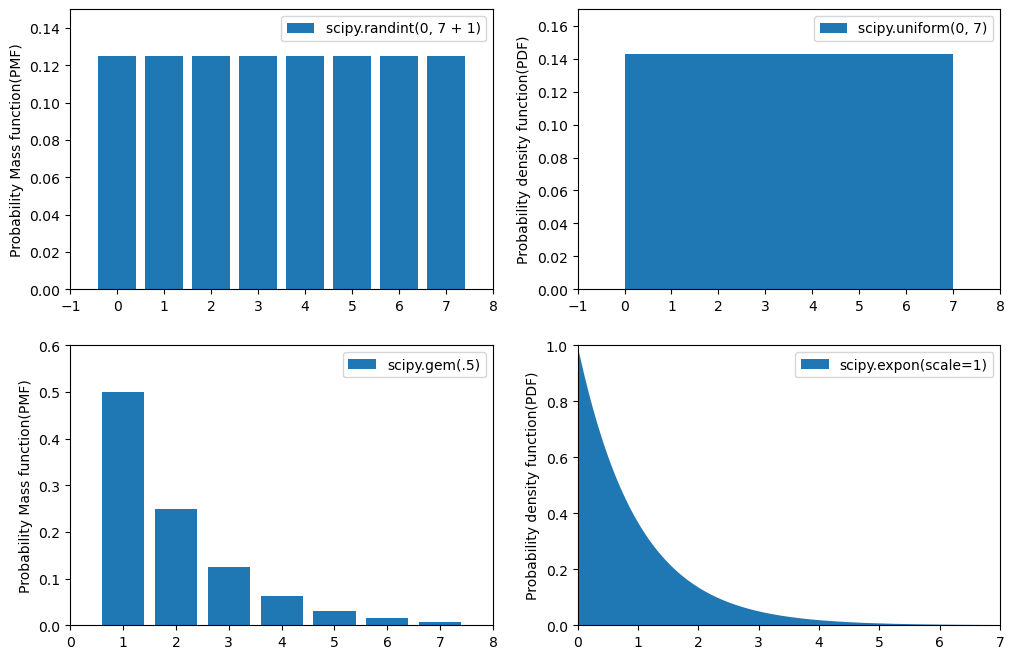

In [169]:
from scipy.stats import randint, uniform, geom, expon

xs1 = np.arange(0, 7 + 1)
randint_distrib = randint(0, 7 + 1).pmf(xs1)

xs2 = np.linspace(0, 7, 500)
uniform_distrib = uniform(0, 7).pdf(xs2)

xs3 = np.arange(0, 7 + 1)
geom_distrib = geom(0.5).pmf(xs3)

xs4 = np.linspace(0, 7, 500)
expon_distrib = expon(scale=1).pdf(xs4)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.bar(xs1, randint_distrib, label='scipy.randint(0, 7 + 1)')
plt.ylabel('Probability Mass function(PMF)')
plt.legend()
plt.axis([-1, 8, 0, .15])

plt.subplot(2, 2, 2)
plt.fill_between(xs2, uniform_distrib, label='scipy.uniform(0, 7)')
plt.ylabel('Probability density function(PDF)')
plt.legend()
plt.axis([-1, 8, 0 , .17])

plt.subplot(2, 2, 3)
plt.bar(xs3, geom_distrib, label='scipy.gem(.5)')
plt.ylabel('Probability Mass function(PMF)')
plt.legend()
plt.axis([0, 8, 0, .6])

plt.subplot(2, 2, 4)
plt.fill_between(xs4, expon_distrib, label='scipy.expon(scale=1)')
plt.ylabel('Probability density function(PDF)')
plt.legend()
plt.axis([0, 7, 0, 1])
plt.show()

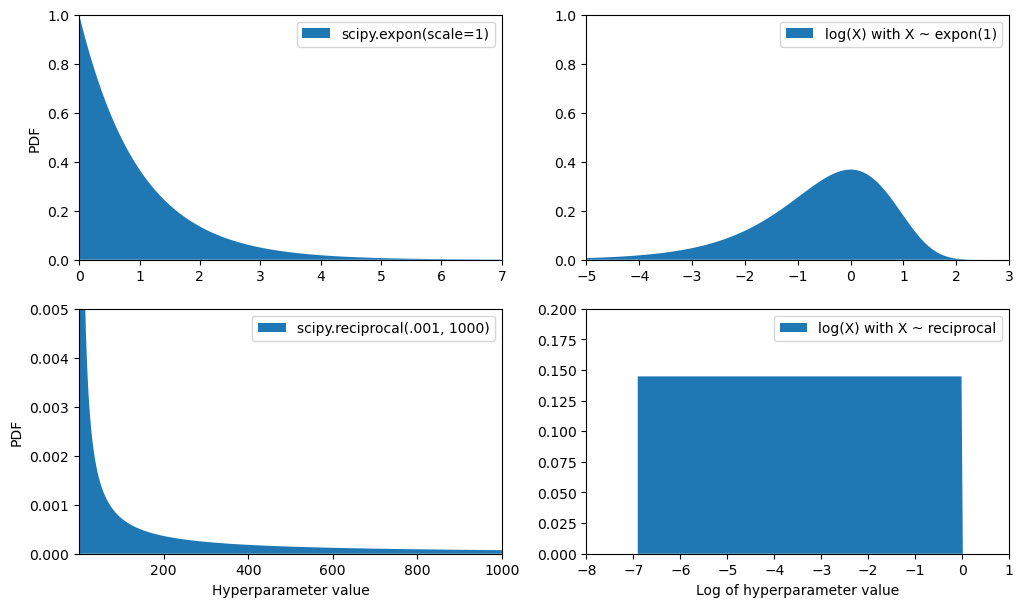

In [204]:
from scipy.stats import reciprocal

xs1 = np.linspace(0, 7, 500)
expon_distrib = expon(scale=1).pdf(xs1)

log_xs2 = np.linspace(-5, 3, 500)
log_expon_distrib = np.exp(log_xs2 - np.exp(log_xs2))

xs3 = np.linspace(.001, 1000, 500)
reciprocal_distrib = reciprocal(.001, 1000).pdf(xs3)

log_xs4 = np.linspace(np.log(.001), np.log(1000), 500)
log_reciprocal_distrib = uniform(np.log(.001), np.log(1000)).pdf(log_xs4)

plt.figure(figsize=(12, 7))

plt.subplot(2, 2, 1)
plt.fill_between(xs1, expon_distrib, label='scipy.expon(scale=1)')
plt.ylabel('PDF')
plt.legend()
plt.axis([0, 7, 0, 1])

plt.subplot(2, 2, 2)
plt.fill_between(log_xs2, log_expon_distrib, label='log(X) with X ~ expon(1)')
plt.legend()
plt.axis([-5, 3, 0, 1])

plt.subplot(2, 2, 3)
plt.fill_between(xs3, reciprocal_distrib, label='scipy.reciprocal(.001, 1000)')
plt.ylabel('PDF')
plt.xlabel('Hyperparameter value')
plt.legend()
plt.axis([.001, 1000, 0, .005])

plt.subplot(2, 2, 4)
plt.fill_between(log_xs4, log_reciprocal_distrib, label='log(X) with X ~ reciprocal')
plt.xlabel('Log of hyperparameter value')
plt.legend()
plt.axis([-8, 1, 0, .2])

plt.show()

设随机变量$X$有概率密度函数 $f(x)$, $x \in (a, b)$($a$, $b$ 可以为 $\infty$), 而 $y = g(x)$ 在 $x \in (a, b)$ 上是严格单调的连续函数，存在唯一的反函数$x =  y \in (\alpha, \beta)$ 并且 $h'(y)$ 存在且连续，那么 $Y = g(X)$ 也是连续型随机变量且有概率密度函数

$$p(y)=f(h(y))|h'(y)|$$

## Ensemble Methods

## Analyzing the Best Models and Their Errors

In [135]:
final_model = rnd_search.best_estimator_
feature_importances = final_model['random_forest'].feature_importances_
feature_importances.round(2)

array([0.07, 0.05, 0.05, 0.01, 0.01, 0.01, 0.01, 0.19, 0.04, 0.01, 0.  ,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.01, 0.01, 0.01, 0.  , 0.01,
       0.01, 0.01, 0.01, 0.01, 0.  , 0.  , 0.02, 0.01, 0.01, 0.01, 0.02,
       0.01, 0.  , 0.02, 0.03, 0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.01,
       0.01, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.01, 0.  , 0.07,
       0.  , 0.  , 0.  , 0.01])

In [205]:
sorted(zip(feature_importances,
           final_model['preprocessing'].get_feature_names_out()),
       reverse=True)

[(0.18694559869103852, 'log__median_income'),
 (0.0748194905715524, 'cat__ocean_proximity_INLAND'),
 (0.06926417748515576, 'bedrooms__ratio'),
 (0.05446998753775219, 'rooms_per_house__ratio'),
 (0.05262301809680712, 'people_per_house__ratio'),
 (0.03819415873915732, 'geo__Cluster 0 similarity'),
 (0.02879263999929514, 'geo__Cluster 28 similarity'),
 (0.023530192521380392, 'geo__Cluster 24 similarity'),
 (0.020544786346378206, 'geo__Cluster 27 similarity'),
 (0.019873052631077512, 'geo__Cluster 43 similarity'),
 (0.018597511022930273, 'geo__Cluster 34 similarity'),
 (0.017409085415656868, 'geo__Cluster 37 similarity'),
 (0.015546519677632162, 'geo__Cluster 20 similarity'),
 (0.014230331127504292, 'geo__Cluster 17 similarity'),
 (0.0141032216204026, 'geo__Cluster 39 similarity'),
 (0.014065768027447325, 'geo__Cluster 9 similarity'),
 (0.01354220782825315, 'geo__Cluster 4 similarity'),
 (0.013489636258229071, 'geo__Cluster 3 similarity'),
 (0.013383196263838682, 'geo__Cluster 38 similarit

## Evaluate Your System on the Test Set

In [213]:
X_test = strat_test_set.drop('median_house_value', axis='columns')
y_test = strat_test_set['median_house_value'].copy()

final_predictions = final_model.predict(X_test)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
final_rmse

41424.40026462184

In [217]:
from scipy import stats
confidence = .95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([39275.40861216, 43467.27680583])